In [1]:
from biocre import diopy_read 
from biocre import scanpy_read_mtx 
from biocre import scanpy_read_h5 
from biocre import linkage
from biocre import calculate_pvalue
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [2]:
# BioCRE support three types of input data.
# 1. read mtx from cellranger output

rna_adata, atac_adata = scanpy_read_mtx('pbmc_data/filtered_feature_bc_matrix')
print(rna_adata)
print(atac_adata)


View of AnnData object with n_obs × n_vars = 3012 × 36601
    var: 'gene_ids', 'feature_types'
View of AnnData object with n_obs × n_vars = 3012 × 77242
    var: 'gene_ids', 'feature_types'


In [3]:
# 2. read h5 from cellranger output

rna_adata, atac_adata = scanpy_read_h5('pbmc_data/pbmc_unsorted_3k_filtered_feature_bc_matrix.h5')
print(rna_adata)
print(atac_adata)

View of AnnData object with n_obs × n_vars = 3009 × 36601
    var: 'gene_ids', 'feature_types', 'genome'
View of AnnData object with n_obs × n_vars = 3009 × 81156
    var: 'gene_ids', 'feature_types', 'genome'


In [4]:
# rna_adata and atac_adata read from cellranger output is suggested to filter low quality cells.
# i.e. Scanpy(https://scanpy.readthedocs.io/en/stable/) or Seurat(https://satijalab.org/seurat/) 
# 3. read processed h5 by diopy

rna_adata = diopy_read('pbmc_data/pbmc_unsorted_3k_rna.h5', assay_name = 'RNA')
atac_adata = diopy_read('pbmc_data/pbmc_unsorted_3k_atac.h5', assay_name = 'peak')
print(rna_adata)
print(atac_adata)

AnnData object with n_obs × n_vars = 3009 × 25880
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    layers: 'counts'
AnnData object with n_obs × n_vars = 3009 × 115978
    obs: 'orig.ident', 'nCount_peak', 'nFeature_peak'
    layers: 'counts'


In [5]:
# Read meta data from cellranger output

meta_data = pd.read_csv('pbmc_data/features.tsv.gz', header = None, sep = '\t')


100%|███████████████████████████████████████████████████████████████████████████████████| 24/24 [04:24<00:00, 11.04s/it]


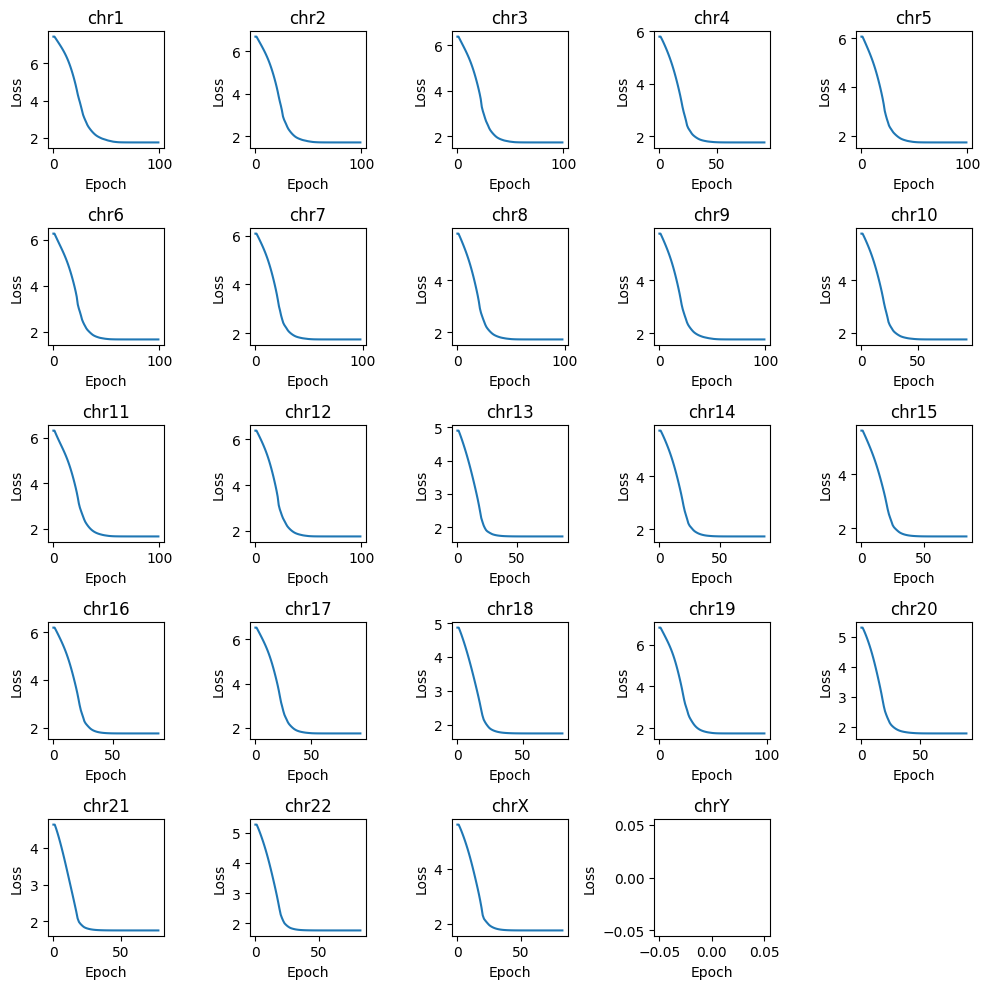

In [6]:
# Running BioCRE

result = linkage(rna_adata, 
                 atac_adata, 
                 meta_data, 
                 lr=0.1, 
                 max_iter=100, 
                 plot=True)

In [7]:
# Calculate p value of gene-peak in 1MB region.

result_pvalue = calculate_pvalue(result, 
                                 meta_data,
                                 upstearm = 500000,
                                 downstream = 500000
                                )

100%|███████████████████████████████████████████████████████████████████████████████████| 24/24 [09:17<00:00, 23.21s/it]


In [8]:
# Select significant CREs

result_pvalue_sig = result_pvalue[result_pvalue['Combine_p_value'] < 1e-7].sort_values(by='Combine_p_value', ascending=True)
result_pvalue_sig

,Gene,Peak,Value,P.adj_Gene,P.adj_Peak,Combine_p_value
172500,CD8A,chr2-86825753-86826655,0.008421,2.957743e-165,5.011632e-251,0.000000e+00
601449,PRF1,chr10-70603362-70604108,0.020986,9.341982e-194,0.000000e+00,0.000000e+00
650539,MS4A1,chr11-60455251-60456170,0.017470,2.369614e-172,0.000000e+00,0.000000e+00
172546,CD8B,chr2-86825753-86826655,0.010004,1.439419e-222,0.000000e+00,0.000000e+00
848175,IGHM,chr14-105817748-105818656,0.042538,1.648339e-200,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
345453,ANKHD1,chr5-140251240-140252167,0.004724,4.451961e-04,5.489749e-90,9.911451e-08
639811,CYP2R1,chr11-14974483-14975346,0.001121,4.455180e-04,3.719249e-08,9.927446e-08
1270902,RRP1B,chr21-43660443-43661188,0.007839,4.460863e-04,3.167705e-21,9.951127e-08
307755,LEF1,chr4-108018194-108019118,0.006840,4.461671e-04,3.767844e-135,9.954736e-08


In [9]:
# Consistent with other tools.  https://stuartlab.org/signac/articles/pbmc_multiomic

result_pvalue_sig.iloc[np.where(result_pvalue_sig['Gene'] == 'MS4A1')[0], :][0:10]

,Gene,Peak,Value,P.adj_Gene,P.adj_Peak,Combine_p_value
650539,MS4A1,chr11-60455251-60456170,0.017470,2.369614e-172,0.000000e+00,0.000000e+00
650542,MS4A1,chr11-60476793-60477701,0.013062,2.730745e-97,0.000000e+00,3.728485e-194
650545,MS4A1,chr11-60498524-60499378,0.012088,1.568421e-83,0.000000e+00,1.229972e-166
650575,MS4A1,chr11-60931736-60932517,0.009764,7.281782e-55,0.000000e+00,2.651217e-109
650540,MS4A1,chr11-60457345-60458264,0.005815,1.705113e-19,0.000000e+00,1.453706e-38
650533,MS4A1,chr11-60378208-60378713,0.005808,1.892316e-19,5.897325e-147,1.790429e-38
650544,MS4A1,chr11-60485603-60486574,0.005289,4.702963e-16,1.740416e-221,1.105893e-31
650551,MS4A1,chr11-60618403-60619294,0.005241,9.386621e-16,2.618544e-219,4.405433e-31
650531,MS4A1,chr11-60366747-60367670,0.005015,2.252283e-14,1.881174e-206,2.536389e-28
650547,MS4A1,chr11-60528689-60529614,0.004863,1.772508e-13,2.925248e-203,1.570892e-26
